In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("/content/income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


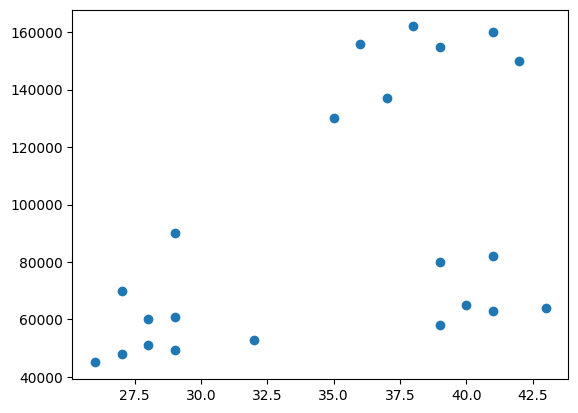

In [33]:
plt.scatter(data['Age'],data['Income($)']);

In [34]:
x = data[['Age','Income($)']]
x

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [35]:
x.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.columns = ['Age','Income($)']

In [42]:
x.describe()

,Age,Income($),Cluster
count,2.200000e+01,2.200000e+01,22.000000
mean,-3.482063e-16,1.059758e-16,0.863636
std,1.023533e+00,1.023533e+00,0.833550
min,-1.529504e+00,-1.068841e+00,0.000000
25%,-1.009157e+00,-7.512363e-01,0.000000
50%,2.917096e-01,-5.394999e-01,1.000000
75%,8.554186e-01,1.054404e+00,1.750000
max,1.419128e+00,1.683732e+00,2.000000


In [38]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [39]:
x['Cluster'] = ypred
x

,Age,Income($),Cluster
0,-1.356055,-0.480684,0
1,-1.009157,-0.010159,0
2,-1.009157,-0.692421,0
3,-1.182606,-0.715947,0
4,1.245679,1.401417,1
5,0.725332,1.519048,1
6,1.072230,1.636679,1
7,0.551883,1.683732,1
8,0.204985,1.542574,1
9,0.031536,0.930891,1


In [40]:
centroids = km.cluster_centers_
centroids

array([[-1.1247901 , -0.74862223],
       [ 0.60143983,  1.40141653],
       [ 0.98550535, -0.51205261]])

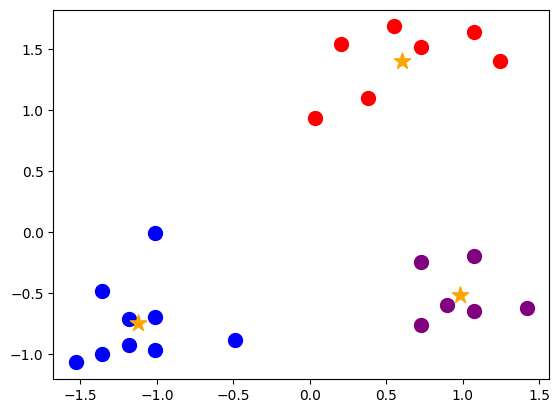

In [41]:
x1 = x[x['Cluster']==0]
x2 = x[x['Cluster']==1]
x3 = x[x['Cluster']==2]
plt.scatter(x1['Age'],x1['Income($)'],color="blue",s=100)
plt.scatter(x2['Age'],x2['Income($)'],color="red",s=100)
plt.scatter(x3['Age'],x3['Income($)'],color="purple",s=100)
plt.scatter(centroids[:,0],centroids[:,1],color="orange",marker="*",s=150);